(-0.5, 314.5, 314.5, -0.5)

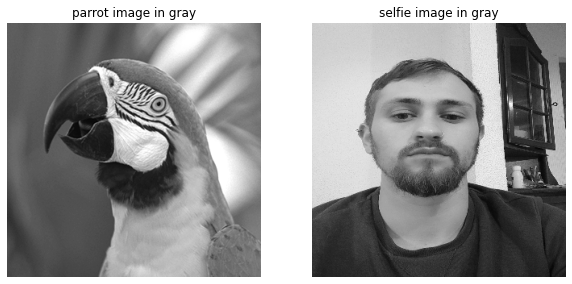

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#3.a
parrot_img = cv2.imread('../given_data/parrot.png')
parrot_img = parrot_img.astype(np.uint8)
parrot_img = cv2.cvtColor(parrot_img, cv2.COLOR_BGR2GRAY)
parrot_h, parrot_w = parrot_img.shape

self_img = cv2.imread('../my_data/yours.jpg')
self_img = self_img.astype(np.uint8)
self_img = cv2.resize(self_img, (parrot_h, parrot_w))
self_img = cv2.cvtColor(self_img, cv2.COLOR_BGR2GRAY)

figure_1 = plt.figure(figsize=(10,10))
ax_1 = figure_1.add_subplot(1, 2, 1)
ax_1.set_title("parrot image in gray")
ax_1.imshow(parrot_img ,cmap='gray')
plt.axis('off')

ax_2 = figure_1.add_subplot(1, 2, 2)
ax_2.set_title("selfie image in gray")
ax_2.imshow(self_img ,cmap='gray')
plt.axis('off')


(-0.5, 314.5, 314.5, -0.5)

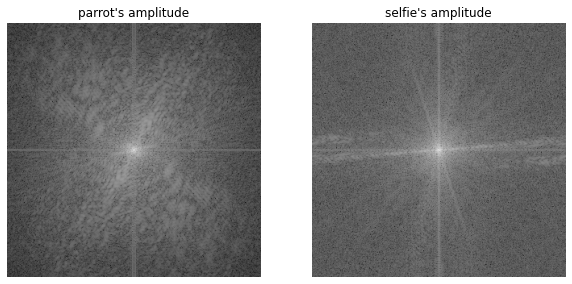

In [5]:
#3.b
fft_p = np.fft.fft2(parrot_img)
fft_p_shifted = np.fft.fftshift(fft_p)
fft_s = np.fft.fft2(self_img)
fft_s_shifted = np.fft.fftshift(fft_s)

parrot_phase = np.angle(fft_p_shifted)
parrot_amp = np.log(1 + np.abs(fft_p_shifted))
selfie_phase = np.angle(fft_s_shifted)
selfie_amp = np.log(1 + np.abs(fft_s_shifted))

figure_2 = plt.figure(figsize=(10,10))
ax_1 = figure_2.add_subplot(1, 2, 1)
ax_1.set_title("parrot's amplitude")
ax_1.imshow(parrot_amp ,cmap='gray')
plt.axis('off')

ax_2 = figure_2.add_subplot(1, 2, 2)
ax_2.set_title("selfie's amplitude")
ax_2.imshow(selfie_amp ,cmap='gray')
plt.axis('off')


(-0.5, 314.5, 314.5, -0.5)

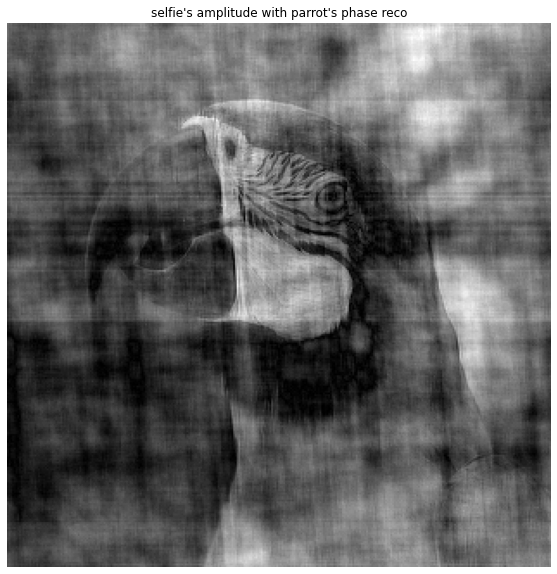

In [6]:
#3.c_1
self_a_parrot_p = np.abs(fft_s_shifted) * np.exp(1j * parrot_phase)
reco_self_w_parrot = np.abs(np.fft.ifft2(np.fft.ifftshift(self_a_parrot_p)))

figure_3 = plt.figure(figsize=(10,10))
ax_1 = figure_3.add_subplot(1, 1, 1)
ax_1.set_title("selfie's amplitude with parrot's phase reco")
ax_1.imshow(reco_self_w_parrot ,cmap='gray')
plt.axis('off')

(-0.5, 314.5, 314.5, -0.5)

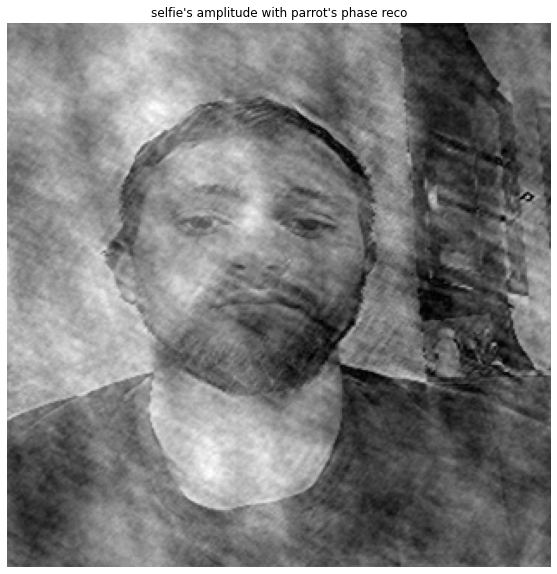

In [18]:
#3.c_2
parrot_a_self_p = np.abs(fft_p_shifted) * np.exp(1j * selfie_phase)
reco_parrot_w_self = np.abs(np.fft.ifft2(np.fft.ifftshift(parrot_a_self_p)))

figure_4= plt.figure(figsize=(10,10))
ax_1 = figure_4.add_subplot(1, 1, 1)
ax_1.set_title("selfie's amplitude with parrot's phase reco")
ax_1.imshow(reco_parrot_w_self ,cmap='gray')
plt.axis('off')

(-0.5, 314.5, 314.5, -0.5)

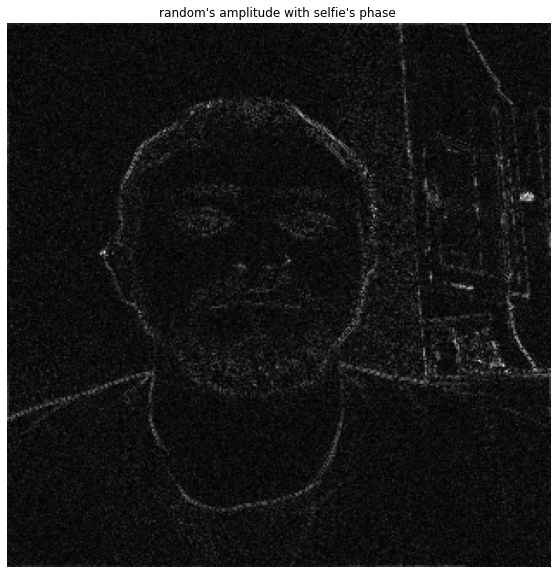

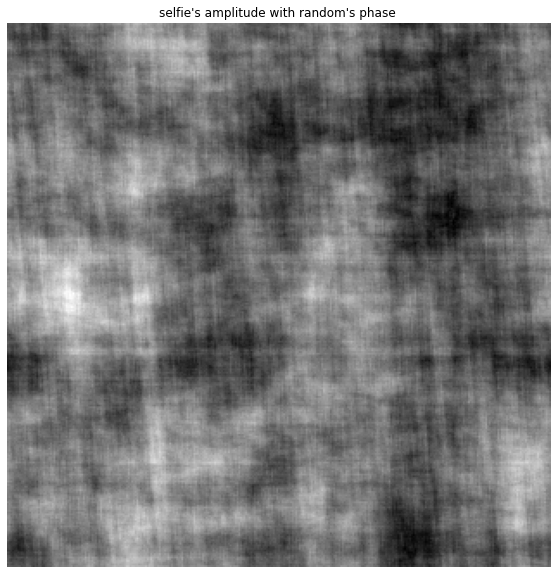

In [7]:
#3.d
random_amp = np.random.random((parrot_h, parrot_w)) * 255 
random_amp_self_phase = np.abs(random_amp) * np.exp(1j * selfie_phase)
reco_rand_amp_w_self = np.abs(np.fft.ifft2(np.fft.ifftshift(random_amp_self_phase)))

figure_5= plt.figure(figsize=(10,10))
ax_1 = figure_5.add_subplot(1, 1, 1)
ax_1.set_title("random's amplitude with selfie's phase ")
ax_1.imshow(reco_rand_amp_w_self,cmap='gray')
plt.axis('off')

random_phase = np.random.random((parrot_h, parrot_w)) * np.pi * 2 - np.pi 
selfie_amp_random_phase = np.abs(fft_s_shifted) * np.exp(1j * random_phase)
reco_amp_rand_phase = np.abs(np.fft.ifft2(selfie_amp_random_phase))

figure_6= plt.figure(figsize=(10,10))
ax_1 = figure_6.add_subplot(1, 1, 1)
ax_1.set_title("selfie's amplitude with random's phase ")
ax_1.imshow(reco_amp_rand_phase,cmap='gray')
plt.axis('off')

